# Índice

1. [Exploración inicial y preparación de los datos](#1.-Exploración-inicial-y-preparación-de-los-datos)

    1.1. [Datos sobre la generación de energía en España](#.1.1.-Datos-sobre-la-generación-de-energía-en-España)

2. [Análisis univariante](#)
3. [Análisis bivariante](#)


## 1. Exploración inicial y preparación de los datos

In [767]:
#Importamos las librerias necesarias
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
import numpy as np
import pandas as pd
import seaborn as sns
import visualizacion_analisis as viz

In [768]:
#Creamos los DataFrames
df_energia = pd.read_csv("./data/estructura_generacion.csv")
df_precios = pd.read_csv("./data/precios.csv")
df_demanda = pd.read_csv("./data/demanda.csv")

Visualizamos los datos en bruto sobre la generación de energía

In [769]:
df_energia.head()

,Fecha,Hidraulica,Turbinacion bombeo,Nuclear,Carbon,Motores diesel,Turbina de gas,Turbina de vapor,Ciclo combinado,Eolica,Solar fotovoltaica,Solar termica,Otras renovables,Cogeneracion,Residuos no renovables,Residuos renovables,Generacion total
0,01/01/2014,73.065052,6.970160,146.015503,25.240655,8.388976,1.481931,6.117065,53.534600,257.896205,7.631801,0.519532,11.897240,54.043077,4.616752,1.877342,659.295892
1,02/01/2014,89.171545,23.682079,146.147546,37.546113,8.659002,2.325496,7.586721,52.322227,270.764404,3.836442,0.177784,11.564649,79.006632,4.743087,1.831754,739.365481
2,03/01/2014,102.502527,23.882275,146.198074,42.672054,8.734932,2.196861,8.043085,51.254562,248.822078,8.673179,1.157242,11.891476,85.658228,4.657517,1.599852,747.943942
3,04/01/2014,106.840706,8.520894,146.270916,30.782043,8.427393,1.620337,6.875346,32.862777,315.077619,8.813196,0.478934,12.103260,65.312961,4.375216,1.519458,749.881056
4,05/01/2014,117.217635,17.345744,121.525188,24.606925,8.346540,1.564459,6.511197,41.422898,260.674588,10.878603,2.137221,11.775113,64.800182,4.462817,1.729626,694.998736


In [770]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha                   3621 non-null   object 
 1   Hidraulica              3621 non-null   float64
 2   Turbinacion bombeo      3621 non-null   float64
 3   Nuclear                 3621 non-null   float64
 4   Carbon                  3621 non-null   float64
 5   Motores diesel          3621 non-null   float64
 6   Turbina de gas          3621 non-null   float64
 7   Turbina de vapor        3621 non-null   float64
 8   Ciclo combinado         3621 non-null   float64
 9   Eolica                  3621 non-null   float64
 10  Solar fotovoltaica      3621 non-null   float64
 11  Solar termica           3621 non-null   float64
 12  Otras renovables        3621 non-null   float64
 13  Cogeneracion            3621 non-null   float64
 14  Residuos no renovables  3621 non-null   

Visualizamos los datos en bruto sobre los precios de la energía

In [771]:
df_precios.head(5)

,Fecha,Precio
0,2014-01-31,50.51
1,2014-02-28,33.33
2,2014-03-31,40.32
3,2014-04-30,40.49
4,2014-05-31,53.20


In [772]:
df_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   119 non-null    object 
 1   Precio  119 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


Visualizamos los datos en bruto sobre la demanda de energía

In [773]:
df_demanda.head(5)

,Fecha,Demanda
0,01/2014,23201.370657
1,02/2014,21412.522674
2,03/2014,22038.118621
3,04/2014,19866.570853
4,05/2014,20616.662364


In [774]:
df_demanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    119 non-null    object 
 1   Demanda  119 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


### 1.1. Datos sobre la generación de energía en España

De la exploración inicial vemos que hay valores nulos. Convertimos el tipo de la columna "Fecha" al formato adecuado y la usamos como índice

In [775]:
df_energia["Fecha"] = pd.to_datetime(df_energia["Fecha"], format='%d/%m/%Y')
df_energia.set_index("Fecha",inplace=True)

Continuamos agrupando la generación de energía en 3 grupos, según el origen de la energía, para el análisis del mix energético:
* Energía generada a partir de fuentes renovables
* Energía generada a partir de combustibles fósiles
* Energía generada por reacciones nucleares

In [776]:
#Energía de origen renovable
df_energia["energia_renovable"] = df_energia["Hidraulica"] + df_energia["Turbinacion bombeo"] + df_energia["Eolica"] + df_energia["Solar fotovoltaica"] + df_energia["Solar termica"] + df_energia["Otras renovables"] + df_energia["Residuos renovables"]
 
#Energía de origen fósil                               
df_energia["energia_fosil"] = df_energia["Carbon"] + df_energia["Motores diesel"] + df_energia["Turbina de gas"] + df_energia["Turbina de vapor"] + df_energia["Ciclo combinado"] + df_energia["Cogeneracion"] + df_energia["Residuos no renovables"]

#Energía nuclear
df_energia["energia_nuclear"] = df_energia["Nuclear"] 

Creamos un DataFrame con la suma de la generación de energía por mes y año

In [777]:
#Hacemos una copia del DataFrame original
df_energia_anyo_mes = df_energia.copy()

#Creamos nuevas columnas auxiliares con el año y el mes
df_energia_anyo_mes["año"] = df_energia_anyo_mes.index.year
df_energia_anyo_mes["mes"] = df_energia_anyo_mes.index.month

#Aplicamos el formato adecuado al mes
df_energia_anyo_mes['mes'] = df_energia_anyo_mes['mes'].apply(lambda x: '{:02d}'.format(x))

#Creamos la columna con la concatenacion de mes y año
df_energia_anyo_mes["año_mes"] = df_energia_anyo_mes["mes"].astype(str) + "/" +  df_energia_anyo_mes["año"].astype(str)

#Convertimos la columna "año_mes" a tipo Date y la usamos como indice
df_energia_anyo_mes["año_mes"] = pd.to_datetime(df_energia_anyo_mes["año_mes"], format='%m/%Y') + pd.offsets.MonthEnd(0)

#Eliminamos las columnas auxiliares creadas inicialmente
df_energia_anyo_mes.drop(columns=["año","mes"],inplace=True)

#Agrupamos por esas fechas
df_energia_anyo_mes = df_energia_anyo_mes.groupby("año_mes").sum()

In [778]:
df_energia_anyo_mes.head(5)

,Hidraulica,Turbinacion bombeo,Nuclear,Carbon,Motores diesel,Turbina de gas,Turbina de vapor,Ciclo combinado,Eolica,Solar fotovoltaica,Solar termica,Otras renovables,Cogeneracion,Residuos no renovables,Residuos renovables,Generacion total,energia_renovable,energia_fosil,energia_nuclear
año_mes,,,,,,,,,,,,,,,,,,,
2014-01-31,4261.392824,443.678644,4526.062779,2293.159522,275.357985,54.877485,216.697507,1809.988573,6570.961682,377.518728,79.800655,380.895587,2550.462421,143.220522,49.339648,24033.414562,12163.587768,7343.764015,4526.062779
2014-02-28,5763.251167,369.221991,4721.937495,884.091427,253.341742,57.405486,176.742116,1522.593868,5917.525957,434.383400,103.264502,293.997433,1876.056059,122.564644,35.868040,22532.245327,12917.512490,4892.795342,4721.937495
2014-03-31,5293.018012,354.775253,5286.792276,1294.242753,255.615002,62.648045,150.180230,1595.228047,5096.447600,735.970624,385.175316,305.878249,1831.179497,112.142408,32.435466,22791.728778,12203.700520,5301.235982,5286.792276
2014-04-30,4986.856873,361.188617,5056.306647,1385.564216,239.877290,65.461729,152.334800,1504.174671,3978.164753,791.985906,435.527059,266.467509,1618.663435,137.938538,51.170320,21031.682363,10871.361037,5104.014679,5056.306647
2014-05-31,2826.765233,275.956466,4336.633309,3367.749593,257.606270,71.625317,145.996242,1711.553922,4177.875518,924.515196,729.935555,330.192006,1931.174991,162.033556,60.551004,21310.164178,9325.790978,7647.739891,4336.633309


In [779]:
df_energia_anyo_mes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2014-01-31 to 2023-11-30
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hidraulica              119 non-null    float64
 1   Turbinacion bombeo      119 non-null    float64
 2   Nuclear                 119 non-null    float64
 3   Carbon                  119 non-null    float64
 4   Motores diesel          119 non-null    float64
 5   Turbina de gas          119 non-null    float64
 6   Turbina de vapor        119 non-null    float64
 7   Ciclo combinado         119 non-null    float64
 8   Eolica                  119 non-null    float64
 9   Solar fotovoltaica      119 non-null    float64
 10  Solar termica           119 non-null    float64
 11  Otras renovables        119 non-null    float64
 12  Cogeneracion            119 non-null    float64
 13  Residuos no renovables  119 non-null    float64
 14  Residuos renovables    

Creamos un DataFrame con la suma de la generación de energía por trimestre y año

In [780]:
#Hacemos una copia del DataFrame original
df_energia_anyo_trim = df_energia.copy()

#Creamos nuevas columnas auxiliares con el año y el trimestre
df_energia_anyo_trim["año"] = df_energia_anyo_trim.index.year
df_energia_anyo_trim["trim"] = df_energia_anyo_trim.index.quarter

#Creamos la columna con la concatenacion de trimestre y año
df_energia_anyo_trim["año_trim"] = df_energia_anyo_trim["trim"].astype(str) + "/" +  df_energia_anyo_trim["año"].astype(str)

#Convertimos la columna "año_trim" a tipo Date y la usamos como indice
#df_energia_anyo_trim["año_trim"] = pd.to_datetime(df_energia_anyo_trim["año_trim"], format='%m/%Y')

#Eliminamos las columnas auxiliares creadas inicialmente
df_energia_anyo_trim.drop(columns=["año","trim"],inplace=True)

#Agrupamos por esas fechas
df_energia_anyo_trim = df_energia_anyo_trim.groupby("año_trim").sum()

In [781]:
df_energia_anyo_trim.head(5)

,Hidraulica,Turbinacion bombeo,Nuclear,Carbon,Motores diesel,Turbina de gas,Turbina de vapor,Ciclo combinado,Eolica,Solar fotovoltaica,Solar termica,Otras renovables,Cogeneracion,Residuos no renovables,Residuos renovables,Generacion total,energia_renovable,energia_fosil,energia_nuclear
año_trim,,,,,,,,,,,,,,,,,,,
1/2014,15317.662003,1167.675888,14534.792550,4471.493702,784.314729,174.931016,543.619853,4927.810488,17584.935239,1547.872752,568.240473,980.771269,6257.697977,377.927574,117.643153,69357.388667,37284.800778,17537.795340,14534.792550
1/2015,9959.420233,937.505428,15160.569864,10899.202954,795.788685,189.130636,560.362925,6336.615826,15854.573435,1725.929600,783.705318,821.431230,6169.924852,582.921534,195.676738,70972.759258,30278.241982,25533.947412,15160.569864
1/2016,11861.257242,1240.454956,13758.734334,6342.836132,827.462313,139.664086,655.224510,5482.541277,17178.078777,1553.829203,580.784193,787.822088,6174.307387,620.984882,186.365590,67390.346970,33388.592049,20243.020587,13758.734334
1/2017,6698.460546,800.176205,15319.345247,10825.286635,850.449241,125.358285,625.783802,6713.475310,14465.424216,1638.940518,578.797668,886.741204,7056.670968,643.473486,207.248061,67435.631392,25275.788418,26840.497727,15319.345247
1/2018,8986.211506,823.837237,14177.562817,8410.610435,738.150640,252.150165,635.996997,6282.129609,17755.474105,1547.115701,576.151611,869.567196,7076.350885,670.844136,222.035460,69024.188500,30780.392816,24066.232867,14177.562817


### 1.2. Datos sobre el precio de la energía en España

De la exploración inicial vemos que hay valores nulos. Convertimos el tipo de la columna "Fecha" al formato adecuado y la usamos como índice

In [782]:
df_precios["Fecha"] = pd.to_datetime(df_precios["Fecha"])
df_precios.set_index("Fecha",inplace=True)

Pasamos los valores del precio de MWh a GWh

In [783]:
df_precios["Precio"] = df_precios["Precio"] * 1000 

Unimos los datos del dataframe de generación de energía por mes y año con éste de precios por mes

In [784]:
df_energia_precio = pd.merge(df_energia_anyo_mes,df_precios, how="inner", left_index=True, right_index=True)

In [785]:
df_energia_precio.head(5)

,Hidraulica,Turbinacion bombeo,Nuclear,Carbon,Motores diesel,Turbina de gas,Turbina de vapor,Ciclo combinado,Eolica,Solar fotovoltaica,Solar termica,Otras renovables,Cogeneracion,Residuos no renovables,Residuos renovables,Generacion total,energia_renovable,energia_fosil,energia_nuclear,Precio
año_mes,,,,,,,,,,,,,,,,,,,,
2014-01-31,4261.392824,443.678644,4526.062779,2293.159522,275.357985,54.877485,216.697507,1809.988573,6570.961682,377.518728,79.800655,380.895587,2550.462421,143.220522,49.339648,24033.414562,12163.587768,7343.764015,4526.062779,50510.0
2014-02-28,5763.251167,369.221991,4721.937495,884.091427,253.341742,57.405486,176.742116,1522.593868,5917.525957,434.383400,103.264502,293.997433,1876.056059,122.564644,35.868040,22532.245327,12917.512490,4892.795342,4721.937495,33330.0
2014-03-31,5293.018012,354.775253,5286.792276,1294.242753,255.615002,62.648045,150.180230,1595.228047,5096.447600,735.970624,385.175316,305.878249,1831.179497,112.142408,32.435466,22791.728778,12203.700520,5301.235982,5286.792276,40320.0
2014-04-30,4986.856873,361.188617,5056.306647,1385.564216,239.877290,65.461729,152.334800,1504.174671,3978.164753,791.985906,435.527059,266.467509,1618.663435,137.938538,51.170320,21031.682363,10871.361037,5104.014679,5056.306647,40490.0
2014-05-31,2826.765233,275.956466,4336.633309,3367.749593,257.606270,71.625317,145.996242,1711.553922,4177.875518,924.515196,729.935555,330.192006,1931.174991,162.033556,60.551004,21310.164178,9325.790978,7647.739891,4336.633309,53200.0


In [786]:
df_energia_precio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2014-01-31 to 2023-11-30
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hidraulica              119 non-null    float64
 1   Turbinacion bombeo      119 non-null    float64
 2   Nuclear                 119 non-null    float64
 3   Carbon                  119 non-null    float64
 4   Motores diesel          119 non-null    float64
 5   Turbina de gas          119 non-null    float64
 6   Turbina de vapor        119 non-null    float64
 7   Ciclo combinado         119 non-null    float64
 8   Eolica                  119 non-null    float64
 9   Solar fotovoltaica      119 non-null    float64
 10  Solar termica           119 non-null    float64
 11  Otras renovables        119 non-null    float64
 12  Cogeneracion            119 non-null    float64
 13  Residuos no renovables  119 non-null    float64
 14  Residuos renovables    

### 1.3. Datos sobre la demanda de energía en España

De la exploración inicial vemos que hay valores nulos. Convertimos el tipo de la columna "Fecha" al formato adecuado y la usamos como índice

In [787]:
df_demanda["Fecha"] = pd.to_datetime(df_demanda["Fecha"], format='%m/%Y') + pd.offsets.MonthEnd(0)
df_demanda.set_index("Fecha",inplace=True)

Unimos los datos del dataframe de generación de energía y precio con éste de la demanda energética por mes

In [788]:
df_energia_precio_demanda = pd.merge(df_energia_precio,df_demanda, how="inner", left_index=True, right_index=True)

In [789]:
df_energia_precio_demanda.head(5)

,Hidraulica,Turbinacion bombeo,Nuclear,Carbon,Motores diesel,Turbina de gas,Turbina de vapor,Ciclo combinado,Eolica,Solar fotovoltaica,...,Otras renovables,Cogeneracion,Residuos no renovables,Residuos renovables,Generacion total,energia_renovable,energia_fosil,energia_nuclear,Precio,Demanda
año_mes,,,,,,,,,,,,,,,,,,,,,
2014-01-31,4261.392824,443.678644,4526.062779,2293.159522,275.357985,54.877485,216.697507,1809.988573,6570.961682,377.518728,...,380.895587,2550.462421,143.220522,49.339648,24033.414562,12163.587768,7343.764015,4526.062779,50510.0,23201.370657
2014-02-28,5763.251167,369.221991,4721.937495,884.091427,253.341742,57.405486,176.742116,1522.593868,5917.525957,434.383400,...,293.997433,1876.056059,122.564644,35.868040,22532.245327,12917.512490,4892.795342,4721.937495,33330.0,21412.522674
2014-03-31,5293.018012,354.775253,5286.792276,1294.242753,255.615002,62.648045,150.180230,1595.228047,5096.447600,735.970624,...,305.878249,1831.179497,112.142408,32.435466,22791.728778,12203.700520,5301.235982,5286.792276,40320.0,22038.118621
2014-04-30,4986.856873,361.188617,5056.306647,1385.564216,239.877290,65.461729,152.334800,1504.174671,3978.164753,791.985906,...,266.467509,1618.663435,137.938538,51.170320,21031.682363,10871.361037,5104.014679,5056.306647,40490.0,19866.570853
2014-05-31,2826.765233,275.956466,4336.633309,3367.749593,257.606270,71.625317,145.996242,1711.553922,4177.875518,924.515196,...,330.192006,1931.174991,162.033556,60.551004,21310.164178,9325.790978,7647.739891,4336.633309,53200.0,20616.662364


In [790]:
df_energia_precio_demanda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2014-01-31 to 2023-11-30
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hidraulica              119 non-null    float64
 1   Turbinacion bombeo      119 non-null    float64
 2   Nuclear                 119 non-null    float64
 3   Carbon                  119 non-null    float64
 4   Motores diesel          119 non-null    float64
 5   Turbina de gas          119 non-null    float64
 6   Turbina de vapor        119 non-null    float64
 7   Ciclo combinado         119 non-null    float64
 8   Eolica                  119 non-null    float64
 9   Solar fotovoltaica      119 non-null    float64
 10  Solar termica           119 non-null    float64
 11  Otras renovables        119 non-null    float64
 12  Cogeneracion            119 non-null    float64
 13  Residuos no renovables  119 non-null    float64
 14  Residuos renovables    

# 2. Análisis

Visualizamos la evolución de la generación de energía con la agrupación por mes y año

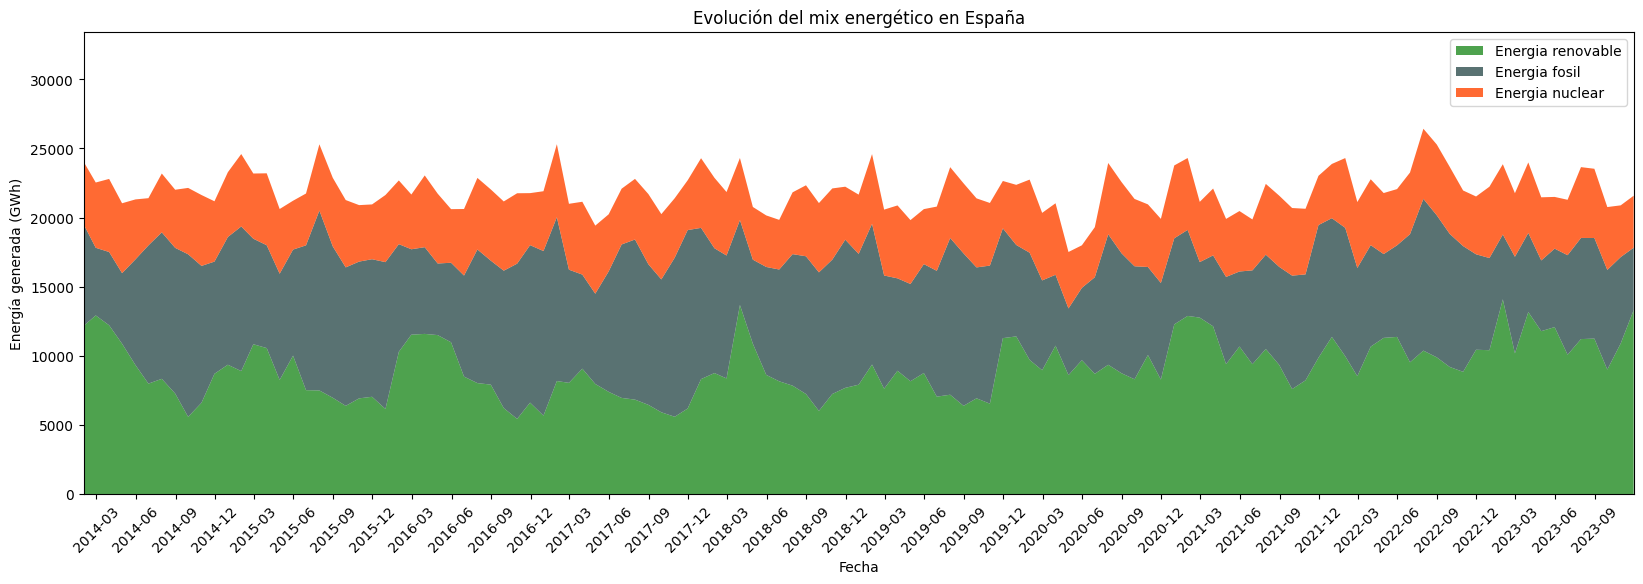

In [791]:
#Creamos la figura
plt.figure(figsize=(20, 6))

#Definimos los colores
color_renovable =  (0.133, 0.545, 0.133, 0.8) #Color "forestgreen" con 80% opacidad
color_fosil = (0.184, 0.310, 0.310, 0.8) #Color "darkslategray" con 80% opacidad
color_nuclear = (1.0, 0.271, 0.0, 0.8) #Color "orangered" con 80% opacidad


#Creamos el gráfico de áreas apiladas
plt.stackplot(df_energia_anyo_mes.index, df_energia_anyo_mes['energia_renovable'], df_energia_anyo_mes['energia_fosil'], df_energia_anyo_mes['energia_nuclear'], \
            labels=['Energia renovable', 'Energia fosil', 'Energia nuclear'], \
            colors=[color_renovable, color_fosil, color_nuclear])

#Definimos el título
plt.title('Evolución del mix energético en España')

#Definimos el eje X, sus limites y la resolucion
plt.xlabel('Fecha')
plt.xlim(df_energia_anyo_mes.index.min(),df_energia_anyo_mes.index.max())

plt.gca().xaxis.set_major_locator(MonthLocator(interval = 3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.xticks(rotation=45)

#Definimos el eje Y y sus limites
plt.ylim(0,df_energia_anyo_mes["Generacion total"].max()+7000)
plt.ylabel('Energía generada (GWh)')

#Mostramos la leyenda
plt.legend(loc='upper right')

plt.show()

In [792]:
df = df_energia_precio_demanda.groupby(df_energia_precio_demanda.index.year)[["energia_fosil", "energia_renovable","energia_nuclear","Generacion total"]].sum()
df

,energia_fosil,energia_renovable,energia_nuclear,Generacion total
año_mes,,,,
2014,100439.157172,111291.240471,54781.281335,266511.678977
2015,115808.550478,96975.271334,54661.803305,267445.625116
2016,101590.510963,104205.606307,56021.682059,261817.799330
2017,119906.576144,86839.597873,55539.351046,262285.525063
2018,105445.883386,102314.745679,53197.617430,260958.246495
2019,105445.805861,99535.555206,55824.226775,260805.587842
2020,82283.751393,113337.098581,55758.359857,251379.209831
2021,81861.695146,124085.372332,54041.019731,259988.087209
2022,99962.450663,120448.480016,55934.105245,276345.035924


In [793]:
df_precio_analisis = df_energia_precio_demanda.groupby(df_energia_precio_demanda.index.year)[["Precio"]].mean()
df_precio_analisis

,Precio
año_mes,
2014,54924.166667
2015,62653.333333
2016,48362.500000
2017,60306.666667
2018,64380.833333
2019,53255.000000
2020,39881.666667
2021,118808.333333
2022,202948.333333


In [794]:
lista_analisis = ["energia_renovable","energia_fosil","energia_nuclear","Precio","Demanda"]

In [795]:
'''
lista_analisis = df_energia_precio_demanda.columns.to_list()
lista_analisis.remove("Generacion total")
lista_analisis.remove("energia_fosil")
lista_analisis.remove("energia_renovable")
lista_analisis.remove("energia_nuclear")

print(lista_analisis)
'''

'\nlista_analisis = df_energia_precio_demanda.columns.to_list()\nlista_analisis.remove("Generacion total")\nlista_analisis.remove("energia_fosil")\nlista_analisis.remove("energia_renovable")\nlista_analisis.remove("energia_nuclear")\n\nprint(lista_analisis)\n'

In [796]:
anyo = 2014
df_heat = df_energia_precio_demanda #.loc[(df_energia_precio_demanda.index.year >= anyo) & (df_energia_precio_demanda.index.year <= anyo)]
df_heat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2014-01-31 to 2023-11-30
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hidraulica              119 non-null    float64
 1   Turbinacion bombeo      119 non-null    float64
 2   Nuclear                 119 non-null    float64
 3   Carbon                  119 non-null    float64
 4   Motores diesel          119 non-null    float64
 5   Turbina de gas          119 non-null    float64
 6   Turbina de vapor        119 non-null    float64
 7   Ciclo combinado         119 non-null    float64
 8   Eolica                  119 non-null    float64
 9   Solar fotovoltaica      119 non-null    float64
 10  Solar termica           119 non-null    float64
 11  Otras renovables        119 non-null    float64
 12  Cogeneracion            119 non-null    float64
 13  Residuos no renovables  119 non-null    float64
 14  Residuos renovables    

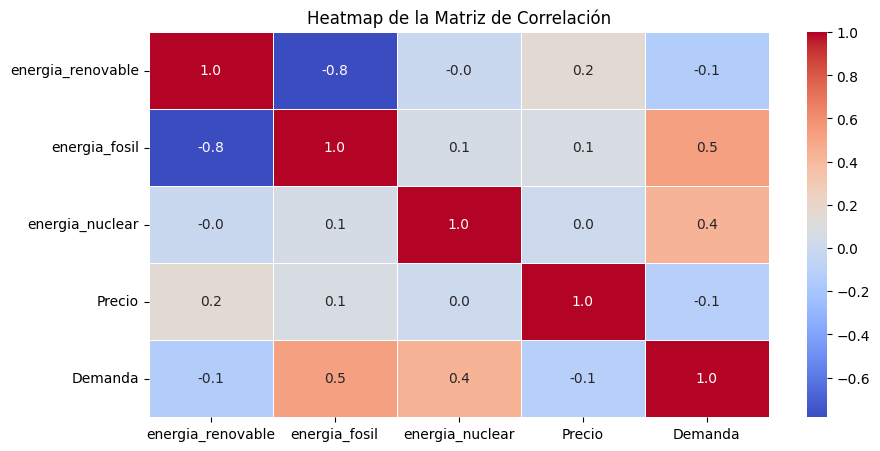

In [797]:
# Calcula la matriz de correlación
correlation_matrix = df_heat.loc[:, lista_analisis].corr() #df_energia_precio_demanda.index.year == 2014

# Crea un heatmap
plt.figure(figsize=(10, 5))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

<Figure size 1000x500 with 0 Axes>

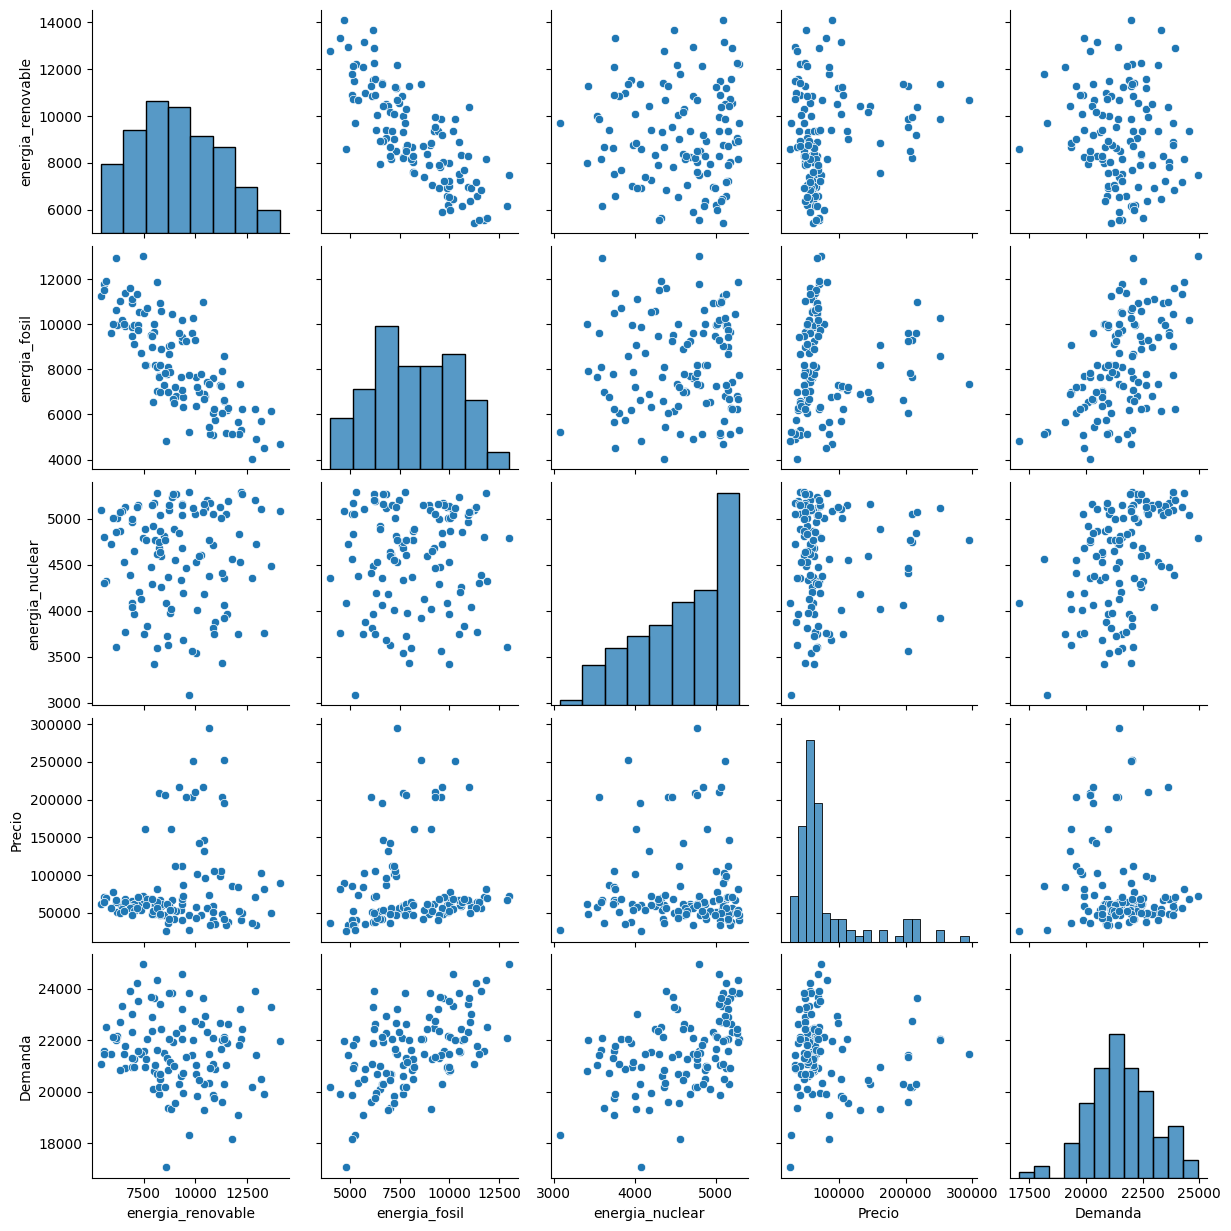

In [798]:
# Crea el pairplot
plt.figure(figsize=(10, 5))

sns.pairplot(df_energia_precio_demanda.loc[:,lista_analisis])
plt.show()

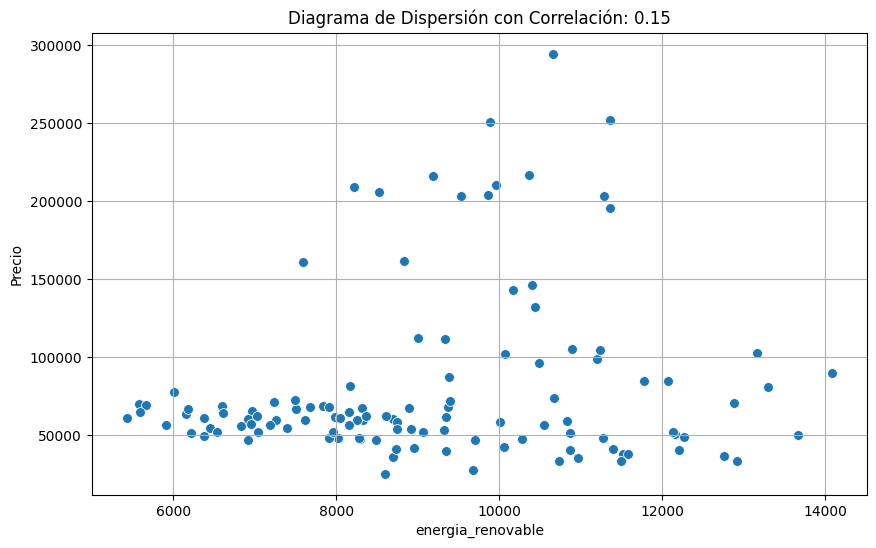

In [799]:
viz.grafico_dispersion_con_correlacion(df_energia_precio,"energia_renovable", "Precio", mostrar_correlacion=True)

| Columna/Variable       | Descripción                                                     | Tipo de variable  | Importancia inicial  | Notas |
|------------------------|-----------------------------------------------------------------|-------------------|----------------------|-------|
| Fecha                  | Fecha de generación                                             | Fecha             | 0                    |       |
| Hidraulica             | Generación diaria de energía hidraulica en GWh                  | Numérica continua | 0                    |       |
| Turbinacion bombeo     | Generación diaria de energía por turbinación por bombeo en GWh  | Numérica continua | 0                    |       |
| Nuclear                | Generación diaria de energía nuclear en GWh                     | Numérica continua | 0                    |       |
| Carbon                 | Generación diaria de energía por carbón en GWh                  | Numérica continua | 0                    |       |
| Motores diesel         | Generación diaria de energía por motores diesel en GWh          | Numérica continua | 0                    |       |

In [800]:
#Definimos una funcion para obtener la principales medidas de tendencia central
def medidas_tendencia_central(df,lista_columnas):
    df_medidas = df.describe()[lista_columnas]
    df_medidas = df_medidas.T
    df_medidas = df_medidas.drop(columns=["count"])
    
    #Incluimos el coeficiente de variacion
    df_medidas["coeficiente_variacion"] = 0.0
    for variable in df_medidas.index:
        cv = round((df_medidas.loc[variable, "mean"]/df_medidas.loc[variable, "std"])*100,2)
        df_medidas.loc[variable, "coeficiente_variacion"] = cv
    
    return df_medidas

In [801]:
lista_columnas = ["energia_renovable","energia_fosil","energia_nuclear","Generacion total"]
medidas_tendencia_central(df_energia_anyo_mes,lista_columnas)

,mean,std,min,25%,50%,75%,max,coeficiente_variacion
energia_renovable,9126.182988,2027.499192,5432.608799,7602.176508,8889.730454,10664.522480,14083.114781,450.12
energia_fosil,8241.167249,2075.618388,4014.643641,6647.433575,7942.358747,9945.818827,13012.215455,397.05
energia_nuclear,4580.214236,544.231422,3078.957761,4189.712909,4716.807315,5070.755992,5289.146024,841.59
Generacion total,21947.564472,1489.170006,17507.192590,21011.629083,21755.197091,22830.181843,26421.495573,1473.81


(2,)


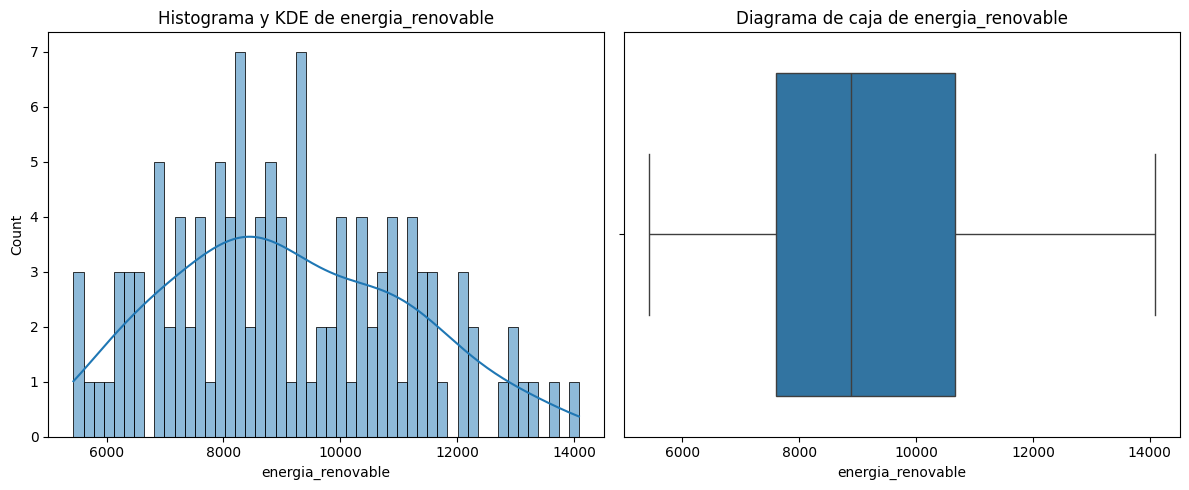

In [802]:
#Visualizamos el histograma, KDE y diagrama de caja
viz.multiples_combinados(df_energia_anyo_mes,["energia_renovable"], bins=50)

* Distribución asimétrica con poca agrupación y dispersa. 
* La mediana de generación diaria de energía se situa en torno a los 12.5 GWh
* Hay muchos *outliers* por encima del *maximum*

## 3. Análisis multivariante